In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from pathlib import Path

In [2]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
df_enrollment_data = pd.read_csv(
    "Resources/enrollment_data.csv", sep=';')

#Display all columns in dataframe
pd.set_option('display.max_columns', None)


#Rename columns
df_enrollment_data.rename(columns = {'Daytime/evening attendance\t': 'Attendance (Evening/Daytime)',
                          'Nacionality': 'Nationality',
                        'Age at enrollment': 'Age at time of enrollment',
                        'International': 'International Student'}, inplace = True)

#Change column characters
df_enrollment_data.columns = (
    df_enrollment_data.columns
    .str.replace('1st sem', '- S1')
    .str.replace('2nd sem', '- S2') 
)

# Review the DataFrame
df_enrollment_data

,Marital status,Application mode,Application order,Course,Attendance (Evening/Daytime),Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at time of enrollment,International Student,Curricular units - S1 (credited),Curricular units - S1 (enrolled),Curricular units - S1 (evaluations),Curricular units - S1 (approved),Curricular units - S1 (grade),Curricular units - S1 (without evaluations),Curricular units - S2 (credited),Curricular units - S2 (enrolled),Curricular units - S2 (evaluations),Curricular units - S2 (approved),Curricular units - S2 (grade),Curricular units - S2 (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,5,4,122.2,0,0,0,1,1,0,19,0,0,6,7,5,13.600000,0,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,9,9,119.0,1,0,1,0,0,0,18,1,0,6,6,6,12.000000,0,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,9,9,149.5,1,0,0,1,0,1,30,0,0,7,8,7,14.912500,0,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,7,4,153.8,1,0,0,1,0,1,20,0,0,5,5,5,13.800000,0,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [3]:
#Print the number of unique values per column in df_enrollent_data 
df_enrollment_data_unique = df_enrollment_data.nunique()
df_enrollment_data_unique

Marital status                                   6
Application mode                                18
Application order                                8
Course                                          17
Attendance (Evening/Daytime)                     2
Previous qualification                          17
Previous qualification (grade)                 101
Nationality                                     21
Mother's qualification                          29
Father's qualification                          34
Mother's occupation                             32
Father's occupation                             46
Admission grade                                620
Displaced                                        2
Educational special needs                        2
Debtor                                           2
Tuition fees up to date                          2
Gender                                           2
Scholarship holder                               2
Age at time of enrollment      

In [4]:
#Categorize the various grades in the "Previous Qualification (Grade)" column into numbered groups based on ranges
def group_grades(grade):
    if 95 <= grade <= 99: #Grades ranging from 95 to 99 are grouped and assigned to number 0
        return 0
    elif 100 <= grade <=109: #Grades ranging from 100 to 109 are grouped and assigned to number 1
        return 1
    elif 110 <= grade <=119: #Grades ranging from 110 to 119 are grouped and assigned to number 2
        return 2
    elif 120 <= grade <=129: #Grades ranging from 120 to 129 are grouped and assigned to number 3
        return 3
    elif 130 <= grade <=139: #Grades ranging from 130 to 139 are grouped and assigned to number 4
        return 4
    elif 140 <= grade <=149: #Grades ranging from 140 to 149 are grouped and assigned to number 5
        return 5
    elif 150 <= grade <=159: #Grades ranging from 150 to 159 are grouped and assigned to number 6
        return 6
    elif 160 <= grade <=169: #Grades ranging from 160 to 169 are grouped and assigned to number 7
        return 7
    elif 170 <= grade <=179: #Grades ranging from 170 to 179 are grouped and assigned to number 8
        return 8
    elif 180 <= grade <=189: #Grades ranging from 180 to 189 are grouped and assigned to number 9
        return 9
    else: #Grades higher than 189 are grouped and assigned to value 10
        return 10
# The grouped grades are applied to the "Previous qualification (grade)" column in df_enrollment_data
df_enrollment_data['Previous qualification (grade)'] = df_enrollment_data['Previous qualification (grade)'].apply(group_grades)



In [5]:
#Categorize the various grades in the "Admission grade" column into numbered groups based on ranges
def group_grades(grade):
    if 95 <= grade <= 99: #Grades ranging from 95 to 99 are grouped and assigned to number 0
        return 0
    elif 100 <= grade <=109: #Grades ranging from 100 to 109 are grouped and assigned to number 1
        return 1
    elif 110 <= grade <=119: #Grades ranging from 110 to 119 are grouped and assigned to number 2
        return 2
    elif 120 <= grade <=129: #Grades ranging from 120 to 129 are grouped and assigned to number 3
        return 3
    elif 130 <= grade <=139: #Grades ranging from 130 to 139 are grouped and assigned to number 4
        return 4
    elif 140 <= grade <=149: #Grades ranging from 140 to 149 are grouped and assigned to number 5
        return 5
    elif 150 <= grade <=159: #Grades ranging from 150 to 159 are grouped and assigned to number 6
        return 6
    elif 160 <= grade <=169: #Grades ranging from 160 to 169 are grouped and assigned to number 7
        return 7
    elif 170 <= grade <=179: #Grades ranging from 170 to 179 are grouped and assigned to number 8
        return 8
    elif 180 <= grade <=189: #Grades ranging from 180 to 189 are grouped and assigned to number 9
        return 9
    else: #Grades higher than 189 are grouped and assigned to value 10
        return 10
# The grouped grades are applied to the "Admission grade" column in df_enrollment_data
df_enrollment_data['Admission grade'] = df_enrollment_data['Admission grade'].apply(group_grades)

In [6]:
#Categorize the various grades in the "Curricular units - S1 (grade)" column into numbered groups based on ranges
def group_grades(grade):
    if 0 <= grade <= 4: #Grades ranging from 0 to 4 are grouped and assigned to number 0
        return 0
    elif 5 <= grade <= 9: #Grades ranging from 5 to 9 are grouped and assigned to number 1
        return 1
    elif 10 <= grade <= 14: #Grades ranging from 10 to 14 are grouped and assigned to number 2
        return 2
    elif 15 <= grade <= 19: #Grades ranging from 15 to 19 are grouped and assigned to number 3
        return 3
    else: #Grades higher than 19 are grouped and assigned to number 4
        return 4 
# The grouped grades are applied to the "Curricular units - S1 (grade)" column in df_enrollment_data
df_enrollment_data['Curricular units - S1 (grade)'] = df_enrollment_data['Curricular units - S1 (grade)'].apply(group_grades)


In [7]:
#Categorize the various grades in the "Curricular units - S2 (grade)" column into numbered groups based on ranges
def group_grades(grade):
    if 0 <= grade <= 4: #Grades ranging from 0 to 4 are grouped and assigned to number 0
        return 0
    elif 5 <= grade <= 9: #Grades ranging from 5 to 9 are grouped and assigned to number 1
        return 1
    elif 10 <= grade <= 14: #Grades ranging from 10 to 14 are grouped and assigned to number 2
        return 2 
    elif 15 <= grade <= 19: #Grades ranging from 15 to 19 are grouped and assigned to number 3
        return 3
    else: #Grades higher than 19 are grouped and assigned to number 4
        return 4
# The grouped grades are applied to the "Curricular units - S2 (grade)" column in df_enrollment_data
df_enrollment_data['Curricular units - S2 (grade)'] = df_enrollment_data['Curricular units - S2 (grade)'].apply(group_grades)


In [8]:
#Print updated dataframe with grouped grade values
df_enrollment_data

,Marital status,Application mode,Application order,Course,Attendance (Evening/Daytime),Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at time of enrollment,International Student,Curricular units - S1 (credited),Curricular units - S1 (enrolled),Curricular units - S1 (evaluations),Curricular units - S1 (approved),Curricular units - S1 (grade),Curricular units - S1 (without evaluations),Curricular units - S2 (credited),Curricular units - S2 (enrolled),Curricular units - S2 (evaluations),Curricular units - S2 (approved),Curricular units - S2 (grade),Curricular units - S2 (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,3,1,19,12,5,9,3,1,0,0,1,1,0,20,0,0,0,0,0,0,0,0,0,0,0,0,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,7,1,1,3,3,3,5,1,0,0,0,1,0,19,0,0,6,6,6,2,0,0,6,6,6,2,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,3,1,37,37,9,9,3,1,0,0,0,1,0,19,0,0,6,0,0,0,0,0,6,0,0,0,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,3,1,38,37,5,3,10,1,0,0,1,0,0,20,0,0,6,8,6,2,0,0,6,10,5,2,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,1,1,37,38,9,9,5,0,0,0,1,0,0,45,0,0,6,9,5,2,0,0,6,6,6,2,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,3,1,1,1,5,4,3,0,0,0,1,1,0,19,0,0,6,7,5,2,0,0,6,8,5,2,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,3,105,1,1,9,9,2,1,0,1,0,0,0,18,1,0,6,6,6,2,0,0,6,6,2,2,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,6,1,37,37,9,9,10,1,0,0,1,0,1,30,0,0,7,8,7,4,0,0,8,9,1,2,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,9,1,37,37,7,4,6,1,0,0,1,0,1,20,0,0,5,5,5,2,0,0,5,6,5,2,0,9.4,-0.8,-3.12,Graduate


In [9]:
#Print the number of unique values for the updated dataframe with grouped grades
df_enrollment_data_cleaned_unique = df_enrollment_data.nunique()
df_enrollment_data_cleaned_unique

Marital status                                  6
Application mode                               18
Application order                               8
Course                                         17
Attendance (Evening/Daytime)                    2
Previous qualification                         17
Previous qualification (grade)                 11
Nationality                                    21
Mother's qualification                         29
Father's qualification                         34
Mother's occupation                            32
Father's occupation                            46
Admission grade                                11
Displaced                                       2
Educational special needs                       2
Debtor                                          2
Tuition fees up to date                         2
Gender                                          2
Scholarship holder                              2
Age at time of enrollment                      46


In [10]:
# Separate the data into labels and features
# Separate the y variable, the labels
y = df_enrollment_data["Target"]

# Separate the X variable, the features
X = df_enrollment_data.drop(columns=["Target"])

# Review the y variable Series
y.head()

0     Dropout
1    Graduate
2     Dropout
3    Graduate
4    Graduate
Name: Target, dtype: object

In [11]:
# Split the data using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5, stratify=y)
# Display the shapes of the training and testing sets to confirm the split
print("Training Features shape (X_train):", X_train.shape)
print("Testing Features shape (X_test):", X_test.shape)
print("Training Labels shape (y_train):", y_train.shape)
print("Testing Labels shape (y_test):", y_test.shape)


Training Features shape (X_train): (3318, 36)
Testing Features shape (X_test): (1106, 36)
Training Labels shape (y_train): (3318,)
Testing Labels shape (y_test): (1106,)


In [12]:
# Create a StandardScaler instance
scaler = preprocessing.StandardScaler()

# Fit the scaler to the training data and transform both training and testing data
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 and increase max_iteration to 5000
logistic_regression_model = LogisticRegression(random_state=2, C=0.01, max_iter=5000)
logistic_regression_model


LogisticRegression(C=0.01, max_iter=5000, random_state=2)

In [13]:
# Fit the model using the scaled training data
logistic_regression_model.fit(X_train_scaled, y_train)

LogisticRegression(C=0.01, max_iter=5000, random_state=2)

In [14]:
# Get the feature names from the DataFrame
feature_names = X.columns

# Get the coefficients from the logistic regression model
coefficients = logistic_regression_model.coef_[0]

# Create a DataFrame to display feature names and their corresponding coefficients
feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Score the model
print(f"Training Data Score: {logistic_regression_model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {logistic_regression_model.score(X_test_scaled, y_test)}")

Training Data Score: 0.7739602169981917
Testing Data Score: 0.7540687160940326


In [15]:
predictions = logistic_regression_model.predict(X_test)
predictions_df = pd.DataFrame({"Prediction": predictions, "Actual": y_test})
predictions_df

,Prediction,Actual
3014,Dropout,Dropout
2359,Dropout,Dropout
1533,Dropout,Enrolled
3575,Dropout,Graduate
392,Dropout,Dropout
...,...,...
4125,Dropout,Enrolled
726,Dropout,Graduate
3958,Dropout,Graduate
3212,Dropout,Graduate


In [16]:
# Now you can evaluate the model on the scaled test data
accuracy = logistic_regression_model.score(X_test_scaled, y_test)
print(f"Model accuracy: {accuracy:.2f}")

Model accuracy: 0.75


C:\Users\swire\AppData\Local\Temp\ipykernel_23888\268741219.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance, x='Coefficient', y='Feature', palette='viridis')


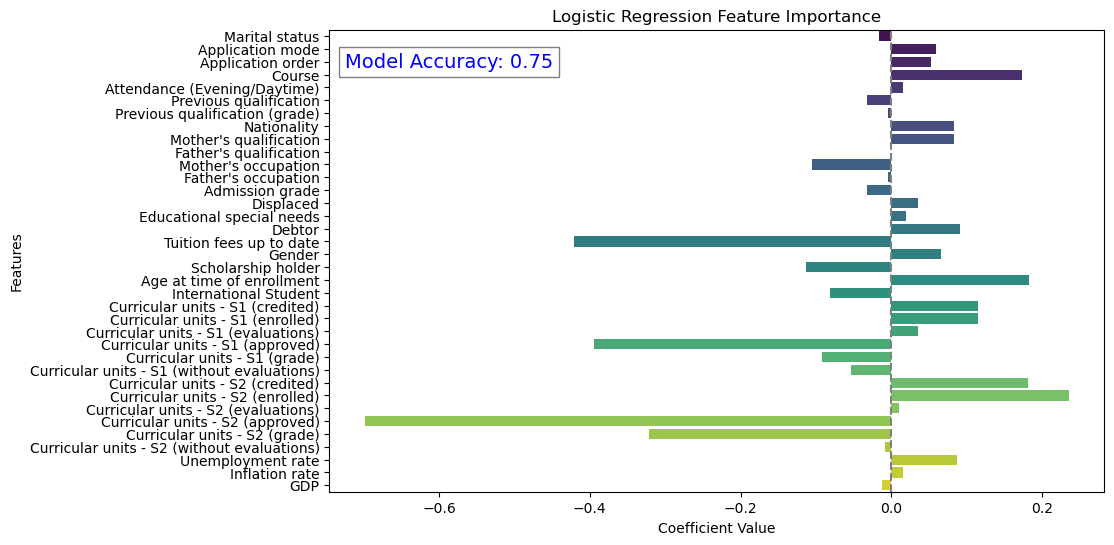

In [29]:
#Size the figure
plt.figure(figsize=(10, 6))

#Add labels
sns.barplot(data=feature_importance, x='Coefficient', y='Feature', palette='viridis')

#Add title
plt.title('Logistic Regression Feature Importance')

#Add label for X-value
plt.xlabel('Coefficient Value')

#Add label for y-value
plt.ylabel('Features')

#Add line for 0 to separate negative and positive coefficient values
plt.axvline(0, color='grey', linestyle='--')

#Add accuracy score to graph
plt.text(0.02, 0.95, f'Model Accuracy: {accuracy:.2f}', ha='left', va='top', transform=plt.gca().transAxes, fontsize=14, color='blue', bbox=dict(facecolor='white', alpha=0.5))

#Save graph
plt.savefig('logistic_regression_scores.png',  bbox_inches = 'tight')

#Show the graph
plt.show()